In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py
import numpy as np

from ramandecompy import dataprep
from ramandecompy import datavis

In [ ]:
# dataprep.new_hdf5('dataplot_300')

In [ ]:
# dataprep.add_experiment('dataplot_300.hdf5', '../../spectrafit/300 C/FA_3.6wt__300C_25s.csv')
# dataprep.add_experiment('dataplot_300.hdf5', '../../spectrafit/300 C/FA_3.6wt__300C_35s.csv')
# dataprep.add_experiment('dataplot_300.hdf5', '../../spectrafit/300 C/FA_3.6wt__300C_45s.csv')
# dataprep.add_experiment('dataplot_300.hdf5', '../../spectrafit/300 C/FA_3.6wt__300C_55s.csv')
# dataprep.add_experiment('dataplot_300.hdf5', '../../spectrafit/300 C/FA_3.6wt__300C_65s.csv')
dataprep.view_hdf5('spectrafit_dev3.hdf5')

In [ ]:
# dataprep.adjust_peaks('dataplot_300.hdf5', '300C/35s', [1270, 1350, 1385], plot_fits=True)

In [ ]:
fig, ax1, ax2 = datavis.plot_fit('spectrafit_dev3.hdf5', '300C/25s')

In [44]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection

def polygon_under_graph(xlist, ylist):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    """
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]

def plot_temp(hdf5_filename, temp):
    """
    docstring
    """
    # open hdf5_file
    hdf5 = h5py.File(hdf5_filename, 'r')
    # intialize 3D plot
    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(111, projection='3d')
    # plot raw spectra data from hdf5 file
    for _, time in enumerate(list(hdf5['{}C'.format(temp)].keys())):
        x_data = list(hdf5['{}C/{}/wavenumber'.format(temp, time)])
        y_data = list(hdf5['{}C/{}/counts'.format(temp, time)]) 
        ax.plot(x_data, y_data, zs=int(time[:-1]), zdir='y', c='blue', linewidth=0.75, alpha=0.7)
    # assign orientation and labels
    ax.view_init(30, -100)
    ax.set_xlabel('Wavenumber', fontsize=8, labelpad=20)
    ax.set_ylabel('Residence Time', fontsize=8, labelpad=10)
    ax.set_zlabel('Counts', fontsize=8, labelpad=10)
    plt.tick_params(labelsize=6)
    # create a title
    ax.set_title('Spectra @ {}C'.format(temp), fontsize=14)
    hdf5.close()
    return fig, ax
    
def plot_3D_component(ax, hdf5_filename, temp, peak_number):
    """
    docstring
    """
    # open hdf5_file
    hdf5 = h5py.File(hdf5_filename, 'r')
    # plot pseudo-voigt profiles
    for _, time in enumerate(list(hdf5['{}C'.format(temp)].keys())):
        key = '{}C/{}'.format(temp, time)
        # extract wavenumber data
        x_data = list(hdf5[key+'/wavenumber'])
        peak_list = list(hdf5[key].keys())
        peak_name = peak_list[peak_number-1]
        # extract pseudo voigt parameters
        peak_params = list(hdf5['{}/{}'.format(key, peak_name)][0])
        fraction, sigma, center, amplitude = peak_params[0:4]
        # calculate pseudo voigt distribution from peak_params
        y_data = datavis.pseudo_voigt(x_data, amplitude, center, sigma, fraction)
        # assign verticies for polygon to represent area under curve
        verts = []
        verts.append(polygon_under_graph(x_data, y_data))
        # plot polygons
        poly = PolyCollection(verts, facecolors='r', alpha=.6)
        ax.add_collection3d(poly, zs=int(time[:-1]), zdir='y')
    # apply title
    if peak_number < 10:
        ax.set_title('Pseudo-Voigt profiles for Peak_0{} @ {}C'.format(peak_number, temp),
                     fontsize=14, pad=35)
    else:
        ax.set_title('Pseudo-Voigt profiles for Peak_{} @ {}C'.format(peak_number, temp),
                     fontsize=14, pad=35)    
    # close hdf5 file
    hdf5.close()
    return

<IPython.core.display.Javascript object>


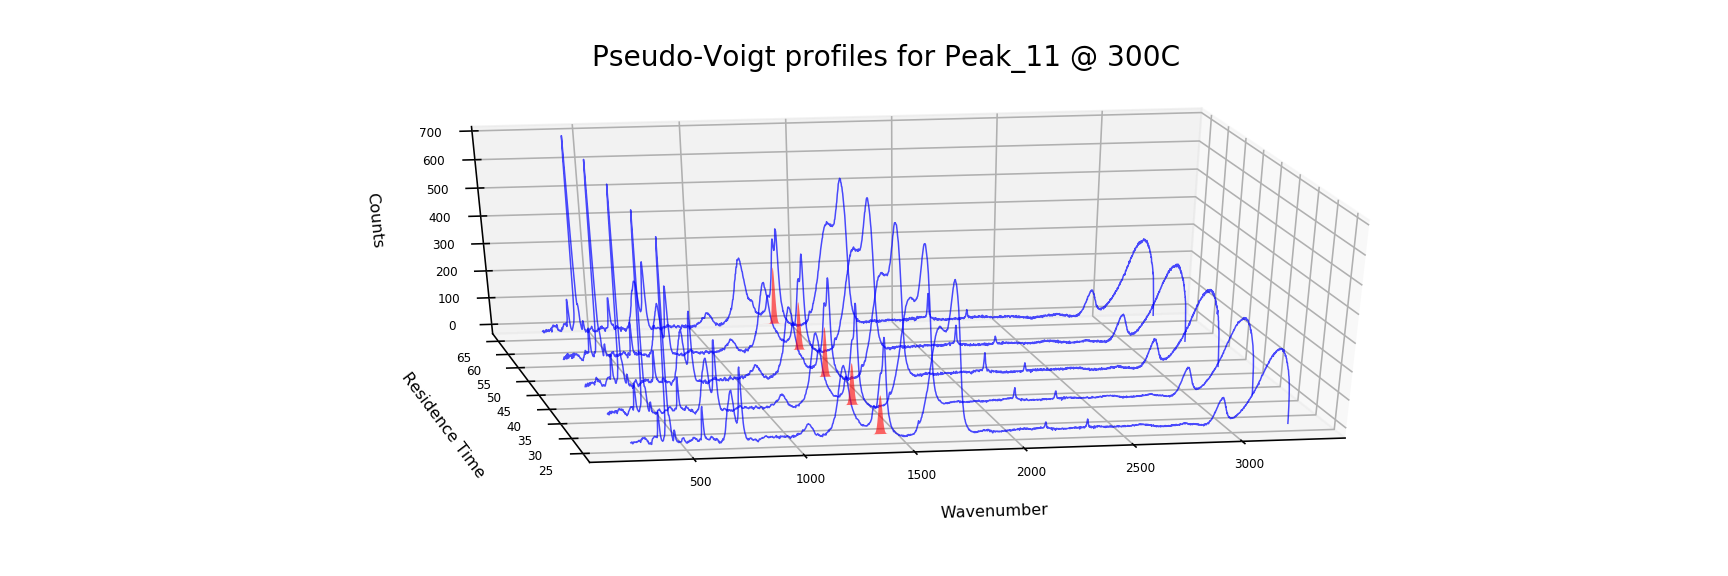

In [46]:
%matplotlib notebook

hdf5_filename = 'spectrafit_dev3.hdf5'
temp = 300
peak_number = 11

fig, ax = plot_temp(hdf5_filename, temp)
plot_3D_component(ax, hdf5_filename, temp, peak_number)